In [1]:
import numpy as np
import os, sys
import pandas as pd
import pybedtools as pbt
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("/dors/capra_lab/users/fongsl/tools/py_")
import config_readwrite as crw
import fet
import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

# functions

In [2]:
def check_section(config, section):
    if config.has_section(section) is False:
        config.add_section(section)
        
    return config

def pbtInt(a, b, out):
    A, B = pbt.BedTool(a), pbt.BedTool(b)
    
    C = A.intersect(B, wao=True, output=out)
    
    return C

# config

In [3]:
cfn = os.path.join(os.path.dirname(os.getcwd()), "config")
config, cfn = crw.read_config(cfn)

## read

In [4]:
# read
BED = config["CIS_TRANS"]["regions"]
ANNOT = config["CIS_TRANS"]["regions_annotations"]
SHUF=config["SHUFFLES"]["shuf-all"]

## write

In [5]:
section = 'CHROMHMM'
config = check_section(config, section)

RE = f"/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/{section}"
GM = "/data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/chromhmm/E116_15_coreMarks_hg38lift_dense.bed"
out = os.path.join(RE, f"regions.x.{section}_GM12878.bed")
out_shuf = os.path.join(RE, f"shuf.regions.x.{section}_GM12878.bed")
out_results = os.path.join(RE, "regions.x.GM12878.enrichments.tsv")

config[section]["GM12878"] = GM
config[section]["results"] = RE
config[section]["regions.x.GM12878"] = out
config[section]["shufregions.x.GM12878"] = out_shuf
config[section]["regions.x.GM12878.results"] = out_results

crw.write(config, cfn)

# intersection

## make results 

In [6]:
if os.path.exists(RE) is False:
    os.mkdir(RE)

## test

In [7]:

if os.path.exists(out) is False:
    C = pbtInt(BED, GM, out)

## shuf

In [8]:

if os.path.exists(out_shuf) is False:
    C = pbtInt(SHUF, GM, out_shuf)

# review results

## atac-starr overlap

In [9]:
df = pd.read_csv(out, sep='\t', header=None, usecols=[1,2,3,4,5,6,7,13])
df.loc[df[13]>0]

,1,2,3,4,5,6,7,13
0,959034,959154,chr1:959034-959154,chr1,958220,959220,1_TssA,120
1,1002089,1002179,chr1:1002089-1002179,chr1,1001220,1002420,2_TssAFlnk,90
2,1064140,1064260,chr1:1064140-1064260,chr1,1063420,1064620,2_TssAFlnk,120
3,1214948,1215208,chr1:1214948-1215208,chr1,1213620,1215820,7_Enh,260
4,1215328,1215508,chr1:1215328-1215508,chr1,1213620,1215820,7_Enh,180
...,...,...,...,...,...,...,...,...
19175,137612004,137612174,chr9:137612004-137612174,chr9,137611748,137612148,7_Enh,144
19176,137612004,137612174,chr9:137612004-137612174,chr9,137612148,137614148,5_TxWk,26
19177,137618549,137618819,chr9:137618549-137618819,chr9,137618148,137620548,1_TssA,270
19178,137619629,137619839,chr9:137619629-137619839,chr9,137618148,137620548,1_TssA,210


In [10]:
names = ["#chr", "start", "end", "region_id", 
         f"chr_{section}", f"start{section}", f"end{section}", f'{section}_id', "len"]
df = pd.read_csv(out, sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,13], )
df.columns=names
print(df.shape, df.loc[df["len"]>0].shape[0])

df.head()

(19180, 9) 19162


,#chr,start,end,region_id,chr_CHROMHMM,startCHROMHMM,endCHROMHMM,CHROMHMM_id,len
0,chr1,959034,959154,chr1:959034-959154,chr1,958220,959220,1_TssA,120
1,chr1,1002089,1002179,chr1:1002089-1002179,chr1,1001220,1002420,2_TssAFlnk,90
2,chr1,1064140,1064260,chr1:1064140-1064260,chr1,1063420,1064620,2_TssAFlnk,120
3,chr1,1214948,1215208,chr1:1214948-1215208,chr1,1213620,1215820,7_Enh,260
4,chr1,1215328,1215508,chr1:1215328-1215508,chr1,1213620,1215820,7_Enh,180


## shuffles

In [11]:
shuf = pd.read_csv(out_shuf, sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,13], )
shuf.columns=names
print(shuf.shape, shuf.loc[shuf["len"]>0].shape[0])
shuf.head()

(201641, 9) 201378


,#chr,start,end,region_id,chr_CHROMHMM,startCHROMHMM,endCHROMHMM,CHROMHMM_id,len
0,chr5,115170417,115170537,chr1:959034-959154,chr5,115170303,115170703,11_BivFlnk,120
1,chr4,37686249,37686339,chr1:1002089-1002179,chr4,37685378,37686978,1_TssA,90
2,chr20,32762661,32762781,chr1:1064140-1064260,chr20,32761994,32762794,1_TssA,120
3,chr7,98133420,98133680,chr1:1214948-1215208,chr7,98133088,98133888,2_TssAFlnk,260
4,chr1,84689773,84689953,chr1:1215328-1215508,chr1,84688317,84691117,1_TssA,180


## annots

In [12]:
annot = pd.read_csv(ANNOT, sep='\t')
annot.head()

,#chr,start,end,region_id,conserved_active.regions,cis,trans,trans_only,cis_only,cis+trans,...,HH-active_MM-inactive_MH-inactive_cis,HH-active_MM-inactive_HM-inactive_trans,HH-active_MM-inactive_cis-only,HH-active_MM-inactive_trans-only,HH-active_MM-inactive_cis+trans,MM-active_HH-inactive_HM-inactive_cis,MM-active_HH-inactive_MH-inactive_trans,MM-active_HH-inactive_cis-only,MM-active_HH-inactive_trans-only,MM-active_HH-inactive_cis+trans
0,chr1,959034,959154,chr1:959034-959154,0.0,1.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,chr1,1002089,1002179,chr1:1002089-1002179,0.0,1.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,chr1,1064140,1064260,chr1:1064140-1064260,0.0,1.0,0.0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr1,1214948,1215208,chr1:1214948-1215208,0.0,1.0,1.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,chr1,1215328,1215508,chr1:1215328-1215508,0.0,1.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
col = 'HH_active'

pos = annot.loc[annot[col]==1, "region_id"]

                                FANTOM annot+     FANTOM annot- 
                    HH_active    A               B
    matched_shuffle HH_active    C               D

# testing all subcategories

In [14]:
chromHMM_id_annots = list(set(df[f"{section}_id"]))
cols = ["conserved_active.regions",
        'HH-active_MM-inactive_cis-only',
        'HH-active_MM-inactive_trans-only',
        'HH-active_MM-inactive_cis+trans',
        'MM-active_HH-inactive_cis-only',
        'MM-active_HH-inactive_trans-only',
        'MM-active_HH-inactive_cis+trans'
        ]

In [18]:
# add groups to enrichment analysis

chromHMM_id_annots=list(chromHMM_id_annots)

chromHMM_id_annots.append([
                        '4_Tx',
                        '3_TxFlnk',
                        '5_TxWk',
                        '1_TssA',
                        '2_TssAFlnk',
                        '10_TssBiv',
                        '7_Enh',
                        '6_EnhG',
                        '12_EnhBiv',
                        '11_BivFlnk'
                        ])

chromHMM_id_annots.append([
                '4_Tx',
                        '3_TxFlnk',
                        '5_TxWk',
                
                ])
chromHMM_id_annots.append([
             '1_TssA',
                        '2_TssAFlnk',
                        '10_TssBiv',
                ])

chromHMM_id_annots.append([
               '7_Enh',
                        '6_EnhG',
                        '12_EnhBiv',
                        '11_BivFlnk'
                ])


collection={}
cols = ['HH_active', "MM_active", "conserved_active.regions"]
for col in cols:
    pos = annot.loc[annot[col]==1, "region_id"]
    
    # get dataset and matched shuffle ids
    test = df.loc[df["region_id"].isin(pos)]
    test_shuf = shuf.loc[shuf["region_id"].isin(pos)]
    
    for a in chromHMM_id_annots:
        if type(a) is str:
            a = a.split()

        # get dataset and matched shuffle ids
        test = df.loc[df["region_id"].isin(pos)]
        test_shuf = shuf.loc[~shuf["region_id"].isin(pos)]

        # within set, how many elements have annotation, or don't.
        in_annot = test.loc[test[f"{section}_id"].isin(a)].shape[0]
        out_annot = test.loc[~test[f"{section}_id"].isin(a)].shape[0]

        # and in the shuffles?
        inshuf_annot = test_shuf.loc[test_shuf[f"{section}_id"].isin(a)].shape[0]
        outshuf_annot = test_shuf.loc[~test_shuf[f"{section}_id"].isin(a)].shape[0]

        result = fet.get_2x2(in_annot, out_annot, inshuf_annot,outshuf_annot, f"regions_x_shuf_{col}.{a}")
        result["col"], result["chromHMM_id"]  =  col, "_".join(a)
        key="_".join(a)+"."+col

        collection[key] = result

[[57, 11184], [2679, 79160]]
regions_x_shuf_HH_active.['14_ReprPCWk'] [[57, 11184], [2679, 79160]] 0.1505950750311996 5.116914784199774e-85
[[1074, 10167], [12679, 69160]]
regions_x_shuf_HH_active.['7_Enh'] [[1074, 10167], [12679, 69160]] 0.576210861699763 2.4162131355816405e-68
[[225, 11016], [1283, 80556]]
regions_x_shuf_HH_active.['3_TxFlnk'] [[225, 11016], [1283, 80556]] 1.2824186572524567 0.0009295582442033017
[[5614, 5627], [28534, 53305]]
regions_x_shuf_HH_active.['1_TssA'] [[5614, 5627], [28534, 53305]] 1.8638063366119622 8.703088070100984e-206
[[17, 11224], [599, 81240]]
regions_x_shuf_HH_active.['4_Tx'] [[17, 11224], [599, 81240]] 0.2054207713735294 1.1525687394210993e-16
[[96, 11145], [1072, 80767]]
regions_x_shuf_HH_active.['6_EnhG'] [[96, 11145], [1072, 80767]] 0.6489785259436331 2.517241628788412e-05
[[94, 11147], [2872, 78967]]
regions_x_shuf_HH_active.['5_TxWk'] [[94, 11147], [2872, 78967]] 0.23186278931863452 5.711908032265956e-69
[[19, 11222], [742, 81097]]
regions_x_

/dors/capra_lab/users/fongsl/tools/py_/fet.py:26: RuntimeWarning: divide by zero encountered in log2
  "OR_log2" :[np.log2(OR)],
/dors/capra_lab/users/fongsl/tools/py_/fet.py:28: RuntimeWarning: divide by zero encountered in log2
  "ci_lower_diff" :[np.log2(OR) - np.log2(odds_ci[0])],
/dors/capra_lab/users/fongsl/tools/py_/fet.py:30: RuntimeWarning: divide by zero encountered in log2
  "ci_upper_diff" :[np.log2(odds_ci[1])-np.log2(OR)],


[[0, 3481], [1480, 161109]]
regions_x_shuf_conserved_active.regions.['12_EnhBiv'] [[0, 3481], [1480, 161109]] 0.0 3.91521272693007e-14
[[24, 3457], [764, 161825]]
regions_x_shuf_conserved_active.regions.['8_ZNF/Rpts'] [[24, 3457], [764, 161825]] 1.470496920278606 0.07874540540648552
[[1006, 2475], [45701, 116888]]
regions_x_shuf_conserved_active.regions.['2_TssAFlnk'] [[1006, 2475], [45701, 116888]] 1.039601750420332 0.3036747061874068
[[3, 3478], [418, 162171]]
regions_x_shuf_conserved_active.regions.['9_Het'] [[3, 3478], [418, 162171]] 0.3346482744579049 0.04045537144389289
[[19, 3462], [8300, 154289]]
regions_x_shuf_conserved_active.regions.['15_Quies'] [[19, 3462], [8300, 154289]] 0.10201955134228421 6.661805271766867e-53
[[0, 3481], [1135, 161454]]
regions_x_shuf_conserved_active.regions.['13_ReprPC'] [[0, 3481], [1135, 161454]] 0.0 5.4757564148627376e-11
[[2, 3479], [2579, 160010]]
regions_x_shuf_conserved_active.regions.['10_TssBiv'] [[2, 3479], [2579, 160010]] 0.035667391598246

In [16]:

for col in cols:
   
    
    for chromHMM_id in chromHMM_id_annots:
        # within set, how many elements have annotation, or don't.
        in_annot = test.loc[test[f"{section}_id"] == chromHMM_id].drop_duplicates().shape[0]
        out_annot = test.loc[test[f"{section}_id"] != chromHMM_id].drop_duplicates().shape[0]

        # and in the shuffles?
        inshuf_annot = test_shuf.loc[test_shuf[f"{section}_id"] == chromHMM_id].drop_duplicates().shape[0]
        outshuf_annot = test_shuf.loc[test_shuf[f"{section}_id"] != chromHMM_id].drop_duplicates().shape[0]

        result = fet.get_2x2(in_annot, out_annot, inshuf_annot,outshuf_annot, 
                             f"regions_x_shuf_{col}-{chromHMM_id}")
        key = col+chromHMM_id
        result["col"], result["chromHMM_id"]  = col, chromHMM_id

        collection[key] = result

[[3, 3478], [5390, 157199]]
regions_x_shuf_HH_active-14_ReprPCWk [[3, 3478], [5390, 157199]] 0.025156643241749623 2.5158113588192616e-45
[[256, 3225], [24985, 137604]]
regions_x_shuf_HH_active-7_Enh [[256, 3225], [24985, 137604]] 0.4371816764477291 1.0543408433657987e-45
[[69, 3412], [2497, 160092]]
regions_x_shuf_HH_active-3_TxFlnk [[69, 3412], [2497, 160092]] 1.296555632292162 0.037190679119112835
[[2048, 1433], [56888, 105701]]
regions_x_shuf_HH_active-1_TssA [[2048, 1433], [56888, 105701]] 2.655474848389063 3.644453779832839e-176
[[0, 3481], [1329, 161260]]
regions_x_shuf_HH_active-4_Tx [[0, 3481], [1329, 161260]] 0.0 1.3356920577486601e-12
[[20, 3461], [2162, 160427]]
regions_x_shuf_HH_active-6_EnhG [[20, 3461], [2162, 160427]] 0.4287954506151671 2.264508942950066e-05
[[21, 3460], [5612, 156977]]
regions_x_shuf_HH_active-5_TxWk [[21, 3460], [5612, 156977]] 0.16977023842385638 8.165202810847475e-29
[[0, 3481], [1480, 161109]]
regions_x_shuf_HH_active-12_EnhBiv [[0, 3481], [1480, 16

ValueError: ('Lengths must match to compare', (3481,), (10,))

## FDR correction 

In [19]:
fdr_res = fet.fdr_correction(collection)

## fraction of annotations 

fdr_res["frac"] = fdr_res["a"]/(fdr_res["a"]+fdr_res["b"])
fdr_res["frac_shuf"] = fdr_res["c"]/(fdr_res["c"]+fdr_res["d"])

fdr_res = fdr_res.loc[fdr_res["chromHMM_id"]!="."]

## plot results

table = pd.pivot(fdr_res, index="chromHMM_id", columns = "col",  values= 'OR_log2')
table = table.replace(-np.Inf, -4)
p = pd.pivot(fdr_res, index="chromHMM_id", columns = "col",  values= 'asterisks')
p = p.fillna("")

p.sort_index()

/home/fongsl/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


col,HH_active,MM_active,conserved_active.regions
chromHMM_id,,,
10_TssBiv,*,*,*
11_BivFlnk,*,*,*
12_EnhBiv,*,*,*
13_ReprPC,*,*,*
14_ReprPCWk,*,*,*
15_Quies,*,*,*
1_TssA,*,*,*
1_TssA_2_TssAFlnk_10_TssBiv,*,*,*
2_TssAFlnk,*,*,


In [27]:
grouped = [ '1_TssA_2_TssAFlnk_10_TssBiv',
            '4_Tx_3_TxFlnk_5_TxWk',
           '7_Enh_6_EnhG_12_EnhBiv_11_BivFlnk',
          ]
fdr_res.loc[(fdr_res["chromHMM_id"].isin(grouped))&
           (fdr_res["col"]=="HH_active")]

,a,b,c,d,OR,P,ci_lower,ci_lower_diff,ci_upper,ci_upper_diff,...,ci_upper_log2,comparison,col,chromHMM_id,reject_null,FDR_P,asterisks,-log10p,frac,frac_shuf
0,336,10905,4754,77085,0.499602,3.942540e-40,0.446469,0.162219,0.559058,0.162219,...,-0.838930,"regions_x_shuf_HH_active.['4_Tx', '3_TxFlnk', ...",HH_active,4_Tx_3_TxFlnk_5_TxWk,True,8.156979e-40,*,39.088471,0.029891,0.058090
0,9396,1845,52816,29023,2.798488,0.000000e+00,2.656889,0.074909,2.947633,0.074909,...,1.559557,"regions_x_shuf_HH_active.['1_TssA', '2_TssAFln...",HH_active,1_TssA_2_TssAFlnk_10_TssBiv,True,0.000000e+00,*,inf,0.835869,0.645365
0,1240,10001,16109,65730,0.505910,1.797395e-120,0.475747,0.088687,0.537986,0.088687,...,-0.894360,"regions_x_shuf_HH_active.['7_Enh', '6_EnhG', '...",HH_active,7_Enh_6_EnhG_12_EnhBiv_11_BivFlnk,True,1.348046e-119,*,118.870295,0.110310,0.196838


## write results

In [25]:
col_order = [
            'comparison',
            'col',
            'chromHMM_id',
            'frac',
            'OR',
            'FDR_P',
            'a',
            'b',
            'c',
            'd',
            'P',
            'ci_lower',
            'ci_lower_diff',
            'ci_upper',
            'ci_upper_diff',
            'OR_log2',
            'ci_lower_log2',
            'ci_upper_log2',
            'reject_null',
            'asterisks',
            '-log10p',
            'frac_shuf',
]
fdr_res[col_order].to_csv(out_results, sep='\t', index=False)

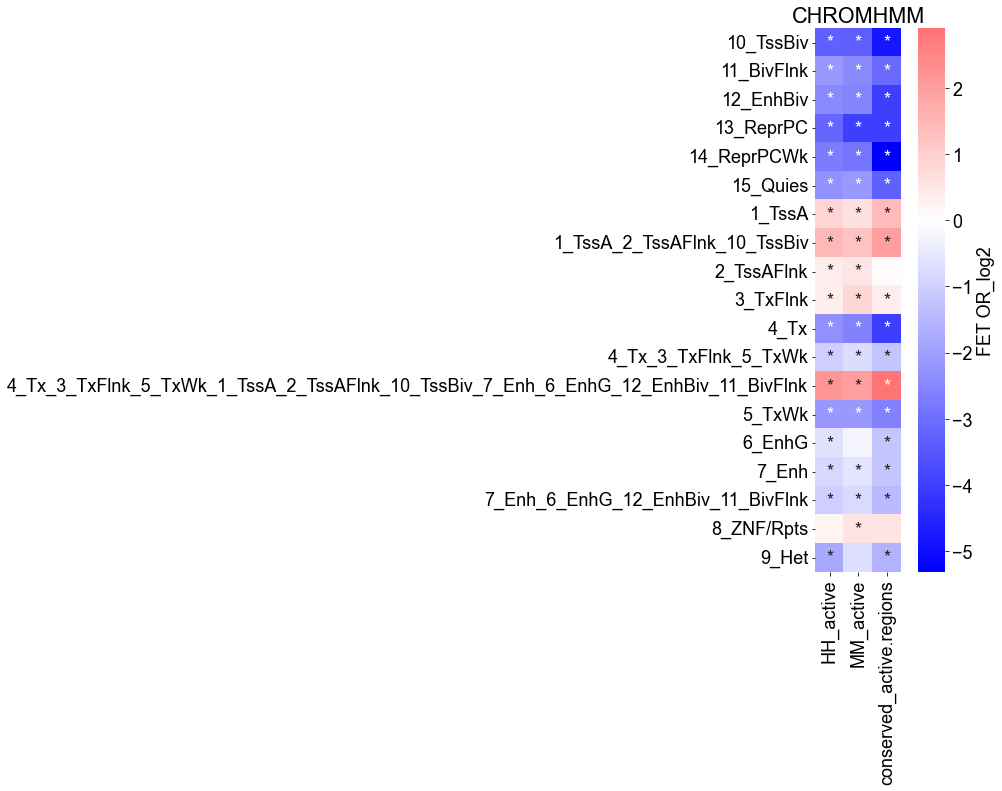

In [28]:
fig, ax = plt.subplots(figsize=(6,10))
sns.heatmap(table.sort_index(), center=0, cmap="bwr", fmt="", 
            square=True,
            annot=p.sort_index(),
            #annot_kws={"fmt":".2e"},
            cbar_kws={"label":"FET OR_log2"}
           )
ax.set(title=f"{section}",
      xlabel='',
      ylabel="")
out=os.path.join(RE, "chromHMM_FETlog2.pdf")
plt.savefig(out, bbox_inches="tight")